# Classification of Charity Donors

In [1]:
import sys
import scipy
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import fbeta_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Load and Review Data

Check dimensions and shape.  Compute a statistical summary - count, mean, min, max and percentiles.

In [2]:
# Load dataset
filename1 ='Donor_raw.csv'
dataset = pd.read_csv(filename1)

In [3]:
print(dataset.shape)
print()
print(dataset.columns)

(19372, 50)

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM

In [4]:
# Describe will calculate descriptive stats for continuous variables
dataset.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,...,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,...,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,...,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,64.000000,27.000000,260.000000,450.000000,41.000000


# Clean Data

Address missing values and duplicates. Replace missing values or characters with NaN.
The income of the charity donor is unlikely to be 0, so count as missing and replace with mean later.

In [5]:
# Replace missing with NaN
NaN_char = ["?","" ," .","-","NULL"]
for char in NaN_char:
    dataset = dataset.replace(char,np.nan)

# The income of the prospect is very unlikely to be zero
dataset['PER_CAPITA_INCOME'].replace(0,np.nan, inplace= True)

dataset['RECENT_STAR_STATUS']= np.where(dataset['RECENT_STAR_STATUS']>1,
                                        0, dataset['RECENT_STAR_STATUS'])

In [6]:
# Count the number of missing values per variable 
# filter on missing data variables
missings = dataset.isnull().sum()[dataset.isnull().sum()!=0]
print('Missing value per variable : \n', missings) 

Missing value per variable : 
 TARGET_D                       14529
DONOR_AGE                       4795
URBANICITY                       454
SES                              454
CLUSTER_CODE                     454
INCOME_GROUP                    4392
WEALTH_RATING                   8810
PER_CAPITA_INCOME                173
MONTHS_SINCE_LAST_PROM_RESP      246
dtype: int64


In [7]:
# All variables
all_var= ['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
          'DONOR_AGE', 'IN_HOUSE', 'INCOME_GROUP', 'PUBLISHED_PHONE',
          'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE', 
          'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
          'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 
          'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_STAR_STATUS', 
          'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
          'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 
          'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
          'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
          'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
          'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
          'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
          'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT']
# target variables
t_var = ['TARGET_B', 'TARGET_D']

# categorical variables
cate_var = ['IN_HOUSE', 'INCOME_GROUP', 'PUBLISHED_PHONE', 
           'WEALTH_RATING', 'PEP_STAR',  'RECENT_STAR_STATUS','FREQUENCY_STATUS_97NK', 
           'RECENT_CARD_RESPONSE_COUNT','URBANICITY', 'SES', 'CLUSTER_CODE',
           'HOME_OWNER', 'DONOR_GENDER', 'OVERLAY_SOURCE', 'RECENCY_STATUS_96NK']

# numerical and continuous variables including target d
conti_var = [ v for v in all_var if v not in cate_var and v not in t_var ]

# The mean is used to replace continuous variables
for v in conti_var:
    m = round(dataset[v].mean())
    dataset[v].fillna(value=m, method=None, axis=0, inplace=True)
    
# The mode is used to replace categorical variables except target B
for v in cate_var:
    m = dataset[v].mode().iloc[0] # mode return dataframe with most frequent categories found - most freq. will be 1st iloc[]
    dataset[v].fillna(value=m, method=None, axis=0, inplace=True)

# Replace the missing value for Target D by Zero / 0 as it means no donation
dataset['TARGET_D'].fillna(value=0, method=None, axis=0, inplace=True)

dataset.head(10)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,0.0,5,101,87.0,0,S,2,40,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,0.0,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,0.0,38,92,59.0,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,0.0,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
5,0,0.0,52,101,63.0,0,U,3,8,U,...,7.0,10.0,3.0,10.0,9,20,19,91,5.82,6
6,0,0.0,53,89,71.0,0,R,3,50,H,...,15.0,20.0,5.0,20.0,7,18,21,91,11.00,8
7,1,5.0,67,89,79.0,0,C,2,28,H,...,4.0,7.0,3.0,5.0,9,24,9,91,5.05,8
8,0,0.0,70,89,41.0,0,C,3,30,H,...,4.0,7.0,3.0,5.0,11,25,17,91,5.03,14
9,1,16.0,71,101,63.0,0,R,2,43,H,...,8.0,11.0,3.0,8.0,11,27,9,91,6.82,13


In [8]:
# Any variables such as control variable and those which pair with other features are deleted.

del_var = ['CONTROL_NUMBER',  'CLUSTER_CODE', 'OVERLAY_SOURCE',
           'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 
           'PCT_ATTRIBUTE4', 'LIFETIME_GIFT_RANGE',
           'FILE_AVG_GIFT','FILE_CARD_GIFT']

dataset.drop(del_var, axis = 1, inplace= True)

In [9]:
# Find any duplicates and drop them
print('Duplicates Number : \n', dataset.duplicated().sum())
dataset.drop_duplicates(subset=None, keep='first',inplace= True)        

Duplicates Number : 
 0


# Change Categorical Variables to 0 and 1 Boolean values.

The models require numerical data so drop dummies used to create 0 and 1 values.

In [10]:
encoded_dataset = pd.get_dummies(dataset, columns = [v for v in cate_var if v not in del_var], drop_first = False)

# Evaluate Models

10-fold cross validation is used for validation.  This means holding out the 1st set as a test set, fitting the model on the remaining training sets and predicting on the test set.  Then hold out a 2nd set as a test set, fit the model on the remaining training sets and predict on the test set and so on.

In [13]:
# Split-out validation dataset

# Convert pandas dataframe into an array
array = encoded_dataset.values

# features/ variables
X = array[:,2:] # : all rows , all columns from the second (exclude target B and target D)

# target B : donation or not
# Y needs to be one column only
y = array[:,0] # : all rows , first column

# the random seed is set to obtain a random sample
seed = 43

# Split-out validation dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)

In [14]:
print(X)

[[101.  87.   0. ...   0.   0.   0.]
 [137.  79.   0. ...   0.   0.   1.]
 [113.  75.   0. ...   0.   0.   1.]
 ...
 [ 29.  59.   0. ...   0.   1.   0.]
 [129.  78.   0. ...   0.   0.   0.]
 [ 29.  70.   2. ...   0.   1.   0.]]


In [15]:
print(y)

[0. 1. 0. ... 0. 0. 1.]


In [16]:
# Test options and evaluation metric
seed = 43
scoring = 'f1' # 'precision' 'recall' ' f1' 

In [17]:
# Create a list of models to test
models = []
models.append(('LogR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('NN',MLPClassifier()))

In [18]:
import warnings
warnings.filterwarnings("ignore")
# Evaluate each model
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)    
    print(f'{name:5} mean of f1 cross val = {cv_results.mean(): 5} std = {cv_results.std(): 9}')

LogR  mean of f1 cross val =  0.007041361903152217 std =  0.0066912259214830135
KNN   mean of f1 cross val =  0.1510003760901663 std =  0.027206912074214693
DT    mean of f1 cross val =  0.2965410512949938 std =  0.025458403958732036
GNB   mean of f1 cross val =  0.3239799336601609 std =  0.02015539472023563
RF    mean of f1 cross val =  0.08433967329696486 std =  0.015576950701160002
NN    mean of f1 cross val =  0.1270468456285575 std =  0.15618591984047234


# Choose Best Model 

Create a plot of the model evaluation results.

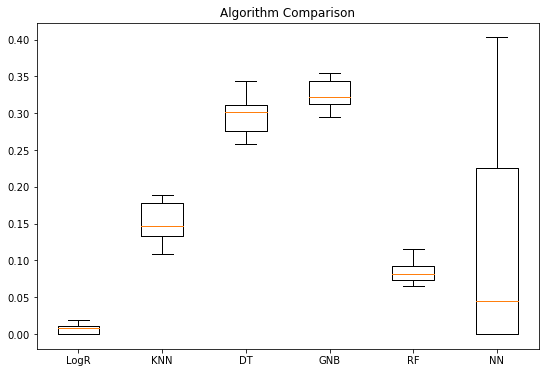

In [26]:
# Compare Algorithms
fig1, ax1 = plt.subplots(figsize=(9,6))
ax1.set_title('Algorithm Comparison')
ax1.set_xticklabels(names)
ax1.boxplot(results)
plt.show()

# Predict using Model with Highest F1 score

Pick model with highest f1 score.  Model will be used with test data to see how it performs on unseen data.

In [41]:
nb = GaussianNB()
# train on the full training set
nb.fit(X_train, y_train)

# apply the model on the test set (validation set)
predictions = nb.predict(X_test)

# Compute f1_score and confusion matrix
f1 = f1_score(y_test, predictions)
print(f'f1_score = {f1: 3}\n\n  Confusion matrix \n')
matrix = confusion_matrix(y_test, predictions)
print(matrix)

f1_score =  0.35034192530247243

  Confusion matrix 

[[2307  566]
 [ 669  333]]


In [50]:
# Get breakdown of confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print(f'True positives = {tp}')
print(f'False positives = {fp}')
print(f'True negatives = {tn}')
print(f'False negatives = {fn}')

True positives = 333
False positives = 566
True negatives = 2307
False negatives = 669


In [53]:
# Compute classification report
class_rep = classification_report(y_test, predictions)
print(class_rep)

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      2873
         1.0       0.37      0.33      0.35      1002

    accuracy                           0.68      3875
   macro avg       0.57      0.57      0.57      3875
weighted avg       0.67      0.68      0.68      3875



# Calculate Cost Difference in Mailling all Potential Donors vs. those Indicated by Model

Use the results of confusion matrix and average gift donated by charity donors to calculate potential cost savings/loss 
proposed by model.

The model is advanatgeous to mailing every potential donor once the mailing cost is above a certain value 

 If the charity mails what the model indicates
The model will have a return on investment of 270  %

If the charity mails every one
The charity will have a return on investment of 159  %


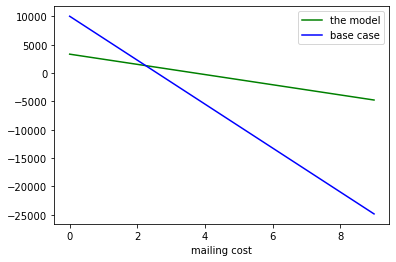

In [56]:
# Add in the average donation and mail cost
mail_cost = 1.00
avg_gift = 10.00

model_gain =[]
base_case = []

for i in range(10):
    model_gain.append(tp*avg_gift-(tp+fp)*i)
    base_case.append((tp+fn)*avg_gift-(tp+fp+tn+fn)*i)
    
fig = plt.figure()
ax = plt.axes()

x = range(10)
y1 = model_gain
y2 = base_case
ax.plot(x,y1,color='green', label ='the model')
ax.plot(x,y2,color='blue', label ='base case')
ax.legend()
plt.xlabel('mailing cost')

print('The model is advanatgeous to mailing every',
      'potential donor once the mailing cost is above a certain value ')

print('\n If the charity mails what the model indicates')
print('The model will have a return on investment of', 
      round((tp*avg_gift-(tp+fp)*mail_cost) / (tp+fp)*mail_cost*100),' %')
print()
print('If the charity mails every one')
print('The charity will have a return on investment of',
      round (((tp+fn)*avg_gift-(tp+fp+tn+fn)*mail_cost)/(tp+fp+tn+fn)*100), ' %')
